## Env Creative

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from tqdm import tqdm
import matplotlib.pyplot as plt
import imageio.v2

## Function to add Gaussian noise to the image

In [2]:
def add_noise(img, noise_level):
    noise = np.random.normal(0, noise_level, img.shape)
    noisy_img = img + noise
    return np.clip(noisy_img, 0, 1)

## Define the DIP model (Assuming a simple CNN architecture)

In [3]:
class DIPModel(nn.Module):
    def __init__(self):
        super(DIPModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 3, kernel_size=3, padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.conv4(x)
        return x

## Define Show Image Function

## Load target image

In [4]:
img_path = '/kaggle/input/lenna-test-image/Lenna_(test_image).png'
target_img = imageio.imread(img_path)

if target_img.dtype == np.uint8:
    target_img = target_img / 255.0

/tmp/ipykernel_24/1330099834.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  target_img = imageio.imread(img_path)


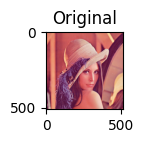

In [5]:
plt.figure(figsize=(3, 1))
plt.title("Original")
plt.imshow(np.clip(target_img, 0, 1))
plt.show()

## Define noise levels and stages

In [6]:
noise_level = 0.1
noisy_img = add_noise(target_img, noise_level)

## Prepare for Training

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [8]:
noisy_img_torch = torch.tensor(noisy_img, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
target_img_torch = torch.tensor(target_img, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)

In [9]:
model = DIPModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

## Training

In [10]:
num_epochs = 3000
patience = 50
best_psnr = 0
best_model = None
psnr_history = []

no_improvement_count = 0  # Initialize the no improvement counter

  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 0, PSNR: 5.3101, SSIM: 0.0146
Epoch [0/3000], Loss: 0.2987, PSNR: 5.3101, SSIM: 0.0146


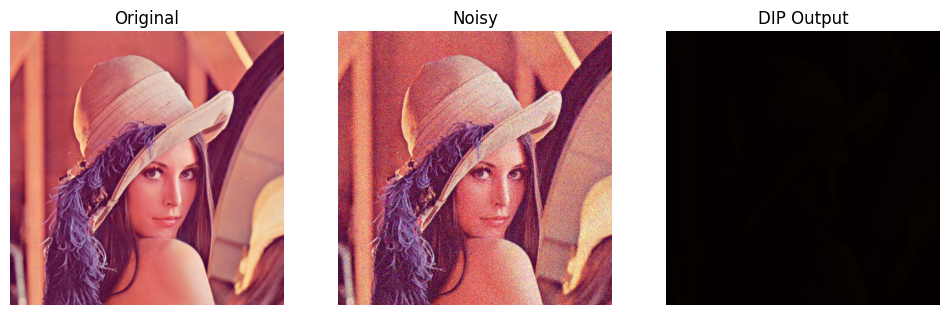

  4%|▍         | 120/3000 [00:07<02:11, 21.85it/s]

Epoch: 100, PSNR: 22.2423, SSIM: 0.7240


  7%|▋         | 220/3000 [00:13<02:07, 21.85it/s]

Epoch: 200, PSNR: 23.5527, SSIM: 0.7453


 11%|█         | 321/3000 [00:18<02:04, 21.52it/s]

Epoch: 300, PSNR: 24.0829, SSIM: 0.7542


 14%|█▍        | 420/3000 [00:24<02:00, 21.47it/s]

Epoch: 400, PSNR: 24.6064, SSIM: 0.7606


 17%|█▋        | 520/3000 [00:29<01:55, 21.43it/s]

Epoch: 500, PSNR: 25.1568, SSIM: 0.7629


 21%|██        | 620/3000 [00:35<01:51, 21.43it/s]

Epoch: 600, PSNR: 25.5099, SSIM: 0.7612


 24%|██▍       | 720/3000 [00:40<01:47, 21.18it/s]

Epoch: 700, PSNR: 25.7400, SSIM: 0.7588


 27%|██▋       | 820/3000 [00:46<01:42, 21.32it/s]

Epoch: 800, PSNR: 26.0231, SSIM: 0.7555


 31%|███       | 920/3000 [00:52<01:38, 21.15it/s]

Epoch: 900, PSNR: 26.2620, SSIM: 0.7531


 33%|███▎      | 999/3000 [00:56<01:50, 18.14it/s]

Epoch: 1000, PSNR: 26.4006, SSIM: 0.7506
Epoch [1000/3000], Loss: 0.0023, PSNR: 26.4006, SSIM: 0.7506


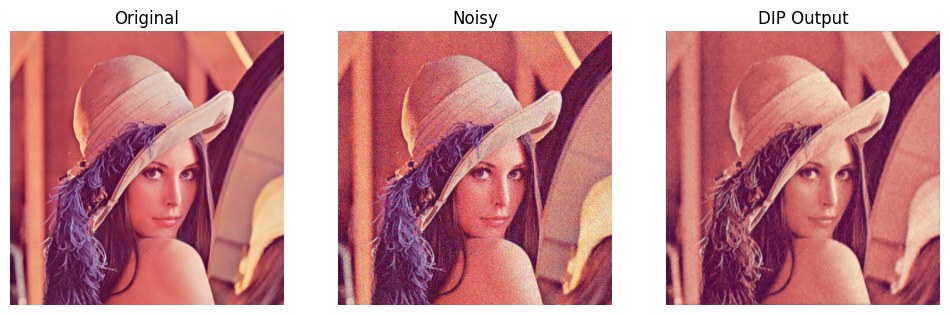

 37%|███▋      | 1120/3000 [01:04<01:28, 21.14it/s]

Epoch: 1100, PSNR: 26.5748, SSIM: 0.7489


 41%|████      | 1220/3000 [01:09<01:24, 21.07it/s]

Epoch: 1200, PSNR: 26.7417, SSIM: 0.7498


 44%|████▍     | 1320/3000 [01:15<01:19, 21.09it/s]

Epoch: 1300, PSNR: 26.9356, SSIM: 0.7444


 47%|████▋     | 1420/3000 [01:21<01:15, 20.88it/s]

Epoch: 1400, PSNR: 27.2003, SSIM: 0.7374


 51%|█████     | 1520/3000 [01:26<01:10, 20.98it/s]

Epoch: 1500, PSNR: 27.3678, SSIM: 0.7412


 54%|█████▍    | 1620/3000 [01:32<01:06, 20.77it/s]

Epoch: 1600, PSNR: 27.6045, SSIM: 0.7360


 57%|█████▋    | 1720/3000 [01:38<01:02, 20.62it/s]

Epoch: 1700, PSNR: 27.7350, SSIM: 0.7397


 61%|██████    | 1820/3000 [01:44<00:57, 20.65it/s]

Epoch: 1800, PSNR: 27.8335, SSIM: 0.7310


 64%|██████▍   | 1920/3000 [01:50<00:53, 20.28it/s]

Epoch: 1900, PSNR: 27.9054, SSIM: 0.7347


 67%|██████▋   | 2000/3000 [01:54<00:57, 17.30it/s]

Epoch: 2000, PSNR: 28.1057, SSIM: 0.7432
Epoch [2000/3000], Loss: 0.0015, PSNR: 28.1057, SSIM: 0.7432


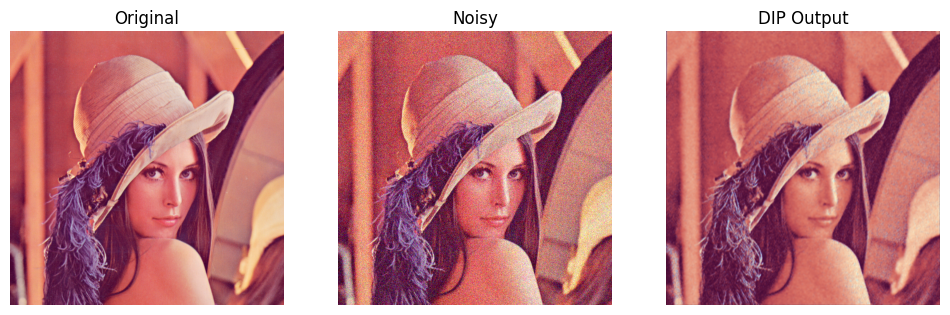

 71%|███████   | 2120/3000 [02:02<00:43, 20.24it/s]

Epoch: 2100, PSNR: 28.1156, SSIM: 0.7450


 74%|███████▍  | 2220/3000 [02:08<00:38, 20.01it/s]

Epoch: 2200, PSNR: 28.1782, SSIM: 0.7411


 77%|███████▋  | 2320/3000 [02:14<00:34, 19.85it/s]

Epoch: 2300, PSNR: 28.1710, SSIM: 0.7433


 81%|████████  | 2420/3000 [02:20<00:29, 19.54it/s]

Epoch: 2400, PSNR: 27.9669, SSIM: 0.7436


 84%|████████▍ | 2520/3000 [02:26<00:24, 19.34it/s]

Epoch: 2500, PSNR: 28.5369, SSIM: 0.7504


 87%|████████▋ | 2620/3000 [02:33<00:19, 19.36it/s]

Epoch: 2600, PSNR: 28.4646, SSIM: 0.7525


 91%|█████████ | 2720/3000 [02:39<00:14, 19.40it/s]

Epoch: 2700, PSNR: 28.6376, SSIM: 0.7531


 94%|█████████▍| 2820/3000 [02:45<00:09, 19.38it/s]

Epoch: 2800, PSNR: 28.3857, SSIM: 0.7554


 97%|█████████▋| 2920/3000 [02:51<00:04, 19.36it/s]

Epoch: 2900, PSNR: 28.7237, SSIM: 0.7530


100%|█████████▉| 2998/3000 [02:56<00:00, 16.48it/s]

Epoch: 2999, PSNR: 28.5502, SSIM: 0.7568
Epoch [2999/3000], Loss: 0.0014, PSNR: 28.5502, SSIM: 0.7568


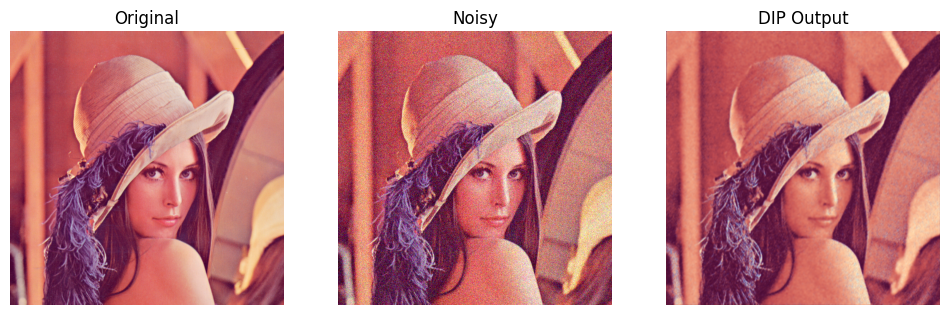

100%|██████████| 3000/3000 [02:58<00:00, 16.82it/s]


In [11]:
for epoch in tqdm(range(num_epochs)):
    model.train()
    optimizer.zero_grad()
    output = model(noisy_img_torch)
    loss = criterion(output, target_img_torch)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0 or epoch == num_epochs - 1:
        model.eval()
        with torch.no_grad():
            output_img = output.squeeze().cpu().numpy().transpose(1, 2, 0)
            output_img = np.clip(output_img, 0, 1)
            current_psnr = psnr(target_img, output_img, data_range=1.0)
            current_ssim = ssim(target_img, output_img, data_range=1.0, channel_axis=-1)
            psnr_history.append(current_psnr)
            print(f"Epoch: {epoch}, PSNR: {current_psnr:.4f}, SSIM: {current_ssim:.4f}")

            # Check for early stopping
            if current_psnr > best_psnr:
                best_psnr = current_psnr
                best_model = model.state_dict()
                no_improvement_count = 0  # Reset counter if improvement
            else:
                no_improvement_count += 1

            if no_improvement_count >= patience:
                print(f"Early stopping at epoch {epoch}")
                break
                        # Plot and save the current output image
            if epoch % 1000 == 0 or epoch == num_epochs - 1:
                print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}, PSNR: {current_psnr:.4f}, SSIM: {current_ssim:.4f}')
                plt.figure(figsize=(12, 6))
                plt.subplot(1, 3, 1)
                plt.title("Original")
                plt.imshow(np.clip(target_img, 0, 1))  
                plt.axis('off')
                plt.subplot(1, 3, 2)
                plt.title("Noisy")
                plt.imshow(np.clip(noisy_img, 0, 1)) 
                plt.axis('off')
                plt.subplot(1, 3, 3)
                plt.title("DIP Output")
                plt.imshow(output_img)
                plt.axis('off')
                plt.show()

In [12]:
model.load_state_dict(best_model)

<All keys matched successfully>

## Evaluation

In [13]:
model.eval()
with torch.no_grad():
    final_output = model(noisy_img_torch).squeeze().cpu().numpy().transpose(1, 2, 0)
    final_output = np.clip(final_output, 0, 1)
    final_psnr = psnr(target_img, final_output, data_range=1.0)
    final_ssim = ssim(target_img, final_output, data_range=1.0, channel_axis=-1)
    print(f"Final PSNR: {final_psnr:.4f}, Final SSIM: {final_ssim:.4f}")

Final PSNR: 28.6911, Final SSIM: 0.7523


## Visulize the result

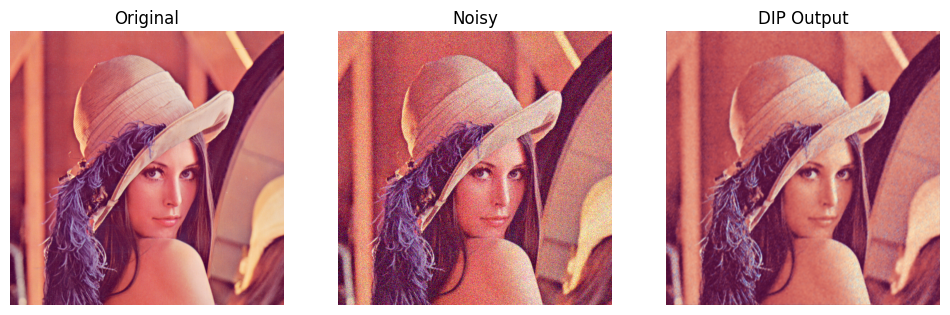

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(np.clip(target_img, 0, 1))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Noisy")
plt.imshow(np.clip(noisy_img, 0, 1))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("DIP Output")
plt.imshow(final_output)
plt.axis('off')
plt.show()